In [24]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


data = pd.read_csv('Hallucination-Dataset-400-Samples.csv')

data.dropna(subset=['Context', 'Question', 'Answer', 'Hallucination'], inplace=True)


X_text = data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(x), axis=1)
y = data['Hallucination']


X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



X_train_array = X_train_tfidf.toarray()
X_test_array = X_test_tfidf.toarray()


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_array.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.save('tf_model')
#loaded_model = tf.keras.models.load_model('tf_model')

history = model.fit(X_train_array, y_train, epochs= 10, batch_size=32, validation_data=(X_test_array, y_test))
loss, accuracy = model.evaluate(X_test_array, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
10/10 [==============================] - 1s 25ms/step - loss: 0.6855 - accuracy: 0.5656 - val_loss: 0.6581 - val_accuracy: 0.6914
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6532 - accuracy: 0.6375 - val_loss: 0.6287 - val_accuracy: 0.7037
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6188 - accuracy: 0.7063 - val_loss: 0.5968 - val_accuracy: 0.7407
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.5892 - accuracy: 0.7375 - val_loss: 0.5620 - val_accuracy: 0.7531
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5479 - accuracy: 0.7625 - val_loss: 0.5279 - val_accuracy: 0.7654
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5075 - accuracy: 0.7937 - val_loss: 0.4981 - val_accuracy: 0.7901
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.4705 - accuracy: 0.8406 - val_loss: 0.4676 - val_accuracy: 0.8025
Epoch 8/10
10/10 [

In [8]:
X_text = data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(x), axis=1)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_full = tfidf_vectorizer.fit_transform(X_text)
X_train_full = X_train_full.toarray()

y_pred = model.predict(X_train_full)
y_pred_binary = (y_pred > 0.5).astype(int)

print(y_pred_binary.flatten())
print(data['Hallucination'].to_numpy())

13/13 [==============================] - 0s 2ms/step
[1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0

In [9]:
data['Prediction'] = y_pred_binary
data.to_csv('Final_Output_Tensorflow.csv', index=False)

In [6]:
import numpy as np
from sklearn.metrics import f1_score

# Get model predictions
y_pred_proba = model.predict(X_test_array)
y_pred = np.round(y_pred_proba).astype(int)

# Convert to 1D arrays if necessary
y_test = np.array(y_test)
y_pred = np.squeeze(y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

3/3 [==============================] - 0s 4ms/step
F1 score: 0.8983050847457628


In [37]:
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model
#model = tf.keras.models.load_model('path_to_your_trained_model.h5')

# Read user input data from CSV
user_input_data = pd.read_csv('input.csv')   # Replace '400Data.csv' with the name of your user input CSV file

# Preprocess user input data
X_text_user = user_input_data[['Context', 'Question', 'Answer']].apply(lambda x: ' '.join(str(i) for i in x if isinstance(i, str)), axis=1)


# Use the same TF-IDF vectorizer
tfidf_vectorizer_user = TfidfVectorizer(max_features=1000)
X_user_tfidf = tfidf_vectorizer_user.fit_transform(X_text_user)

# Convert TF-IDF vectors to arrays
X_user_array = X_user_tfidf.toarray()

# Make predictions
predictions = model.predict(X_user_array)

# Print or save predictions

y_pred_binary = (predictions> 0.5).astype(int)



user_input_data["Prediction"]=y_pred_binary
user_input_data.head()
user_input_data.to_csv("Final_output_of_user.csv")


13/13 [==============================] - 0s 4ms/step


In [ ]:
# prompt: make user output csv file and make prediction column and put the value of

import pandas as pd
user_output_data = pd.DataFrame(columns=['Context', 'Question', 'Answer', 'Prediction'])

user_output_data['Context'] = user_input_data['Context']
user_output_data['Question'] = user_input_data['Question']
user_output_data['Answer'] = user_input_data['Answer']
user_output_data['Prediction'] = y_pred_binary.flatten()

user_output_data.to_csv('user_output.csv', index=False)


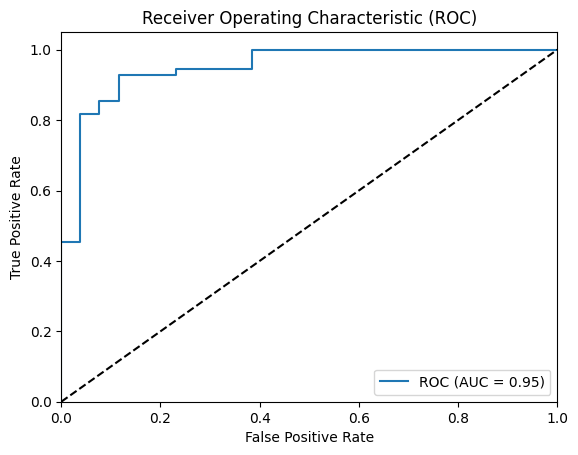

In [25]:
# prompt: Auc/roc graph

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
